In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # to disable the display of all warning messages. 

In [2]:
USA_df = pd.read_csv('honeyproduction 1998-2021.csv')
USA_df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
print(type(USA_df)) # To check the data type of the variable
print(USA_df.shape) # To check the shape of the dataframe

<class 'pandas.core.frame.DataFrame'>
(985, 8)


In [4]:
USA_df.columns

Index(['State', 'numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')

In [5]:
print(USA_df['State'].nunique())
USA_df['State'].unique()

44


array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming', 'South Carolina'], dtype=object)

In [6]:
year = USA_df['year'].value_counts().reset_index()
print(type(year))
year.head()

           

<class 'pandas.core.frame.DataFrame'>


,year,count
0,2001,44
1,2002,44
2,2003,44
3,1998,43
4,2000,43


In [7]:
USA_df.isnull().sum() # Checking for the null values in the dataset

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

In [8]:
USA_df.duplicated().sum()

0

In [9]:
USA_df.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

### Q1) How has honey production yield changed from 1998 to 2021?

In [10]:
q1 = USA_df.groupby(['year'])['yieldpercol'].agg({'sum','mean'})
q1.head()

,mean,sum
year,,
1998,69.953488,3008
1999,65.465116,2815
2000,67.581395,2906
2001,64.545455,2840
2002,66.795455,2939


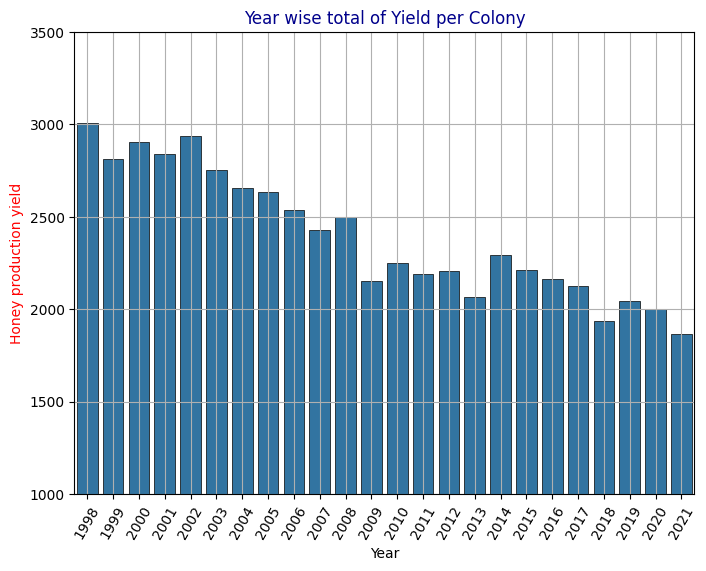

In [11]:
plt.figure(figsize =(8,6))
fig1 = sns.barplot(data = q1, x='year', y='sum', edgecolor='Black',linewidth=0.5, errorbar = None)
sns.pointplot(data = q1, x='year', y='mean',errorbar = None, lw=2, color='red')
plt.title('Year wise total of Yield per Colony', color = 'DarkBlue')
plt.ylim(1000,3500)
plt.xlabel('Year', color = 'Black')
plt.xticks(rotation = 60)
plt.ylabel('Honey production yield', color = 'Red')
plt.grid()
plt.show()

In [12]:
q1.head()


,mean,sum
year,,
1998,69.953488,3008
1999,65.465116,2815
2000,67.581395,2906
2001,64.545455,2840
2002,66.795455,2939


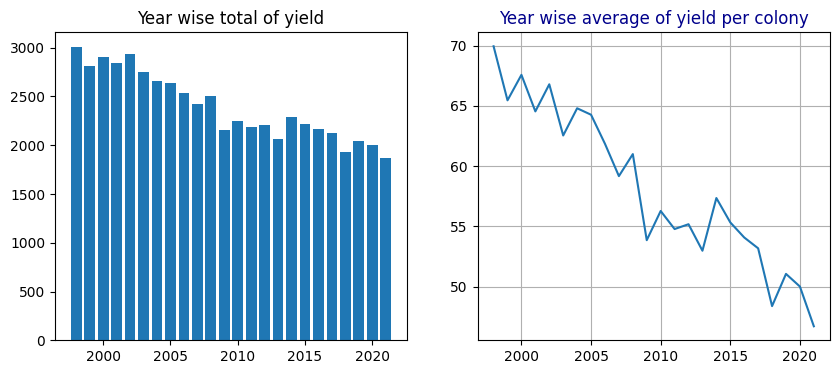

In [13]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.bar(q1.index,q1['sum'])
ax1.set_title('Year wise total of yield')

ax2.plot(q1.index,q1['mean'])
ax2.set_title('Year wise average of yield per colony', color = 'DarkBlue')
ax2.grid()

plt.show()

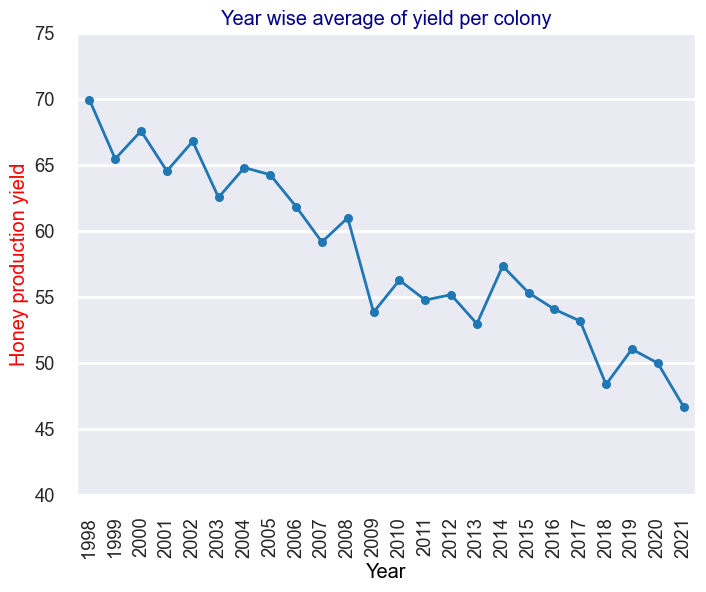

In [14]:
plt.figure(figsize =(8,6))
sns.set_context('poster',font_scale=0.6)
sns.set_style('darkgrid')
fig2 = sns.pointplot(data = USA_df, x='year', y='yieldpercol',errorbar = None, lw=2)
plt.title('Year wise average of yield per colony', color = 'DarkBlue')
plt.xlabel('Year', color = 'Black')
plt.ylim(40,75)
plt.xticks(rotation = 90)
plt.ylabel('Honey production yield', color = 'Red')
plt.show()

### Q2) Over time, what are the major production trends across the states?

In [15]:
q2 = USA_df.groupby(['year'])['totalprod'].mean().reset_index()
q2 = q2.sort_values(by='year', ascending = True)
q2.head()

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06


In [16]:
USA_df['totalprod'] = USA_df['totalprod']/100000 # Coverting Total Production in million
USA_df['totalprod'].head()



0     11.36
1     33.00
2     34.45
3    373.50
4     19.44
Name: totalprod, dtype: float64

In [17]:
USA_df['prodvalue'] = USA_df['prodvalue']/100000 # Coverting Production in million
USA_df['prodvalue'].head()

0      8.18
1     21.12
2     20.33
3    231.57
4     13.61
Name: prodvalue, dtype: float64

In [18]:
plt.figure(figsize =(12,5))
fig3 = sns.lineplot(data = USA_df, x='year', y='q2.values',errorbar = None)
plt.title('State wise production in million lbs', color = 'DarkBlue',fontsize = 15)
plt.xlabel('State', color = 'Black', fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Total production in million lbs', color = 'Red',fontsize = 15)
plt.grid()
plt.show()

ValueError: Could not interpret value `q2.values` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x500 with 0 Axes>

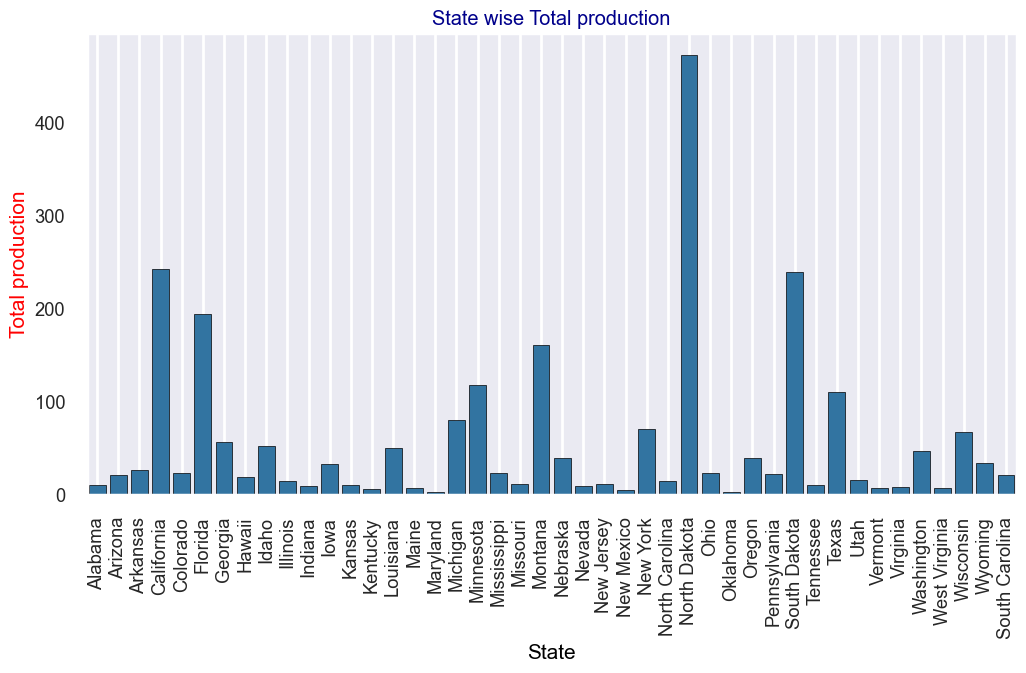

In [ ]:
plt.figure(figsize =(12,6))
fig4 = sns.barplot(data = USA_df, x='State', y='prodvalue',edgecolor='Black',linewidth=0.5, errorbar = None)
plt.title('State wise Total production', color = 'DarkBlue')
plt.xlabel('State', color = 'Black',fontsize = 15)
plt.xticks(rotation = 90)
plt.ylabel('Total production', color = 'Red',fontsize = 15)
plt.grid()
plt.show()

Q3) Does the data show any trends in terms of the number of
honey-producing colonies and yield per colony before 2006, which
was when concern over Colony Collapse Disorder spread nationwide?

In [ ]:
q3 = USA_df[(USA_df['year']<=2006)]
q3.head()
q3.shape


(384, 8)

In [ ]:
q3.dtypes

State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

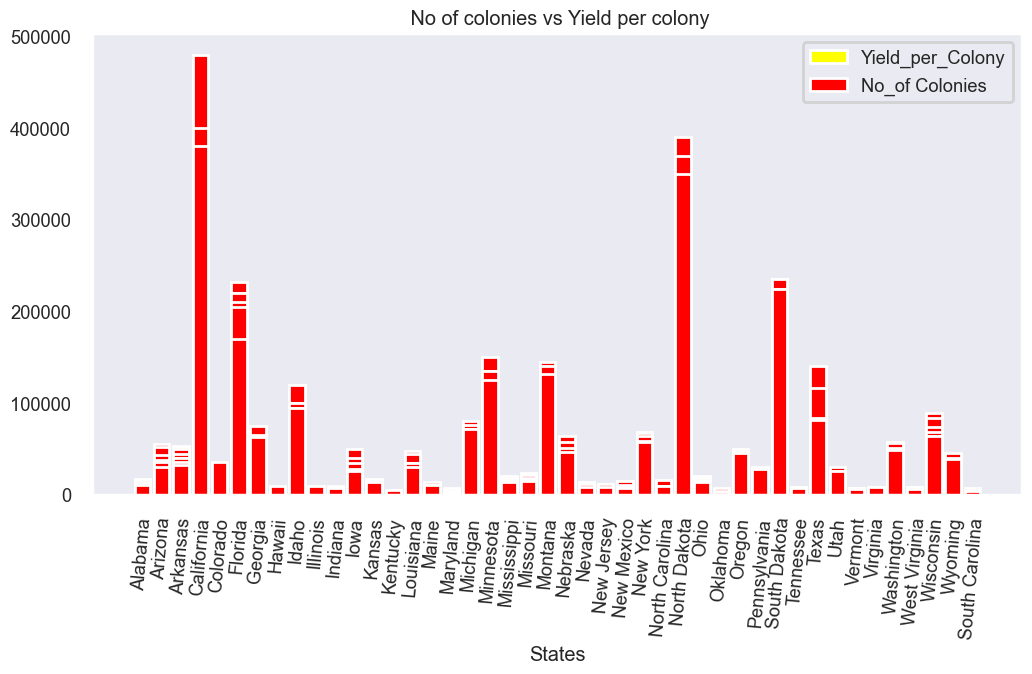

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(q3['State'],q3['yieldpercol'],label='Yield_per_Colony', color ='Yellow')
plt.bar(q3['State'],q3['numcol'], label='No_of Colonies', color ='Red')
plt.xlabel('States')
plt.xticks(rotation = 85)
plt.title(' No of colonies vs Yield per colony')
plt.legend()
plt.grid()
plt.show()

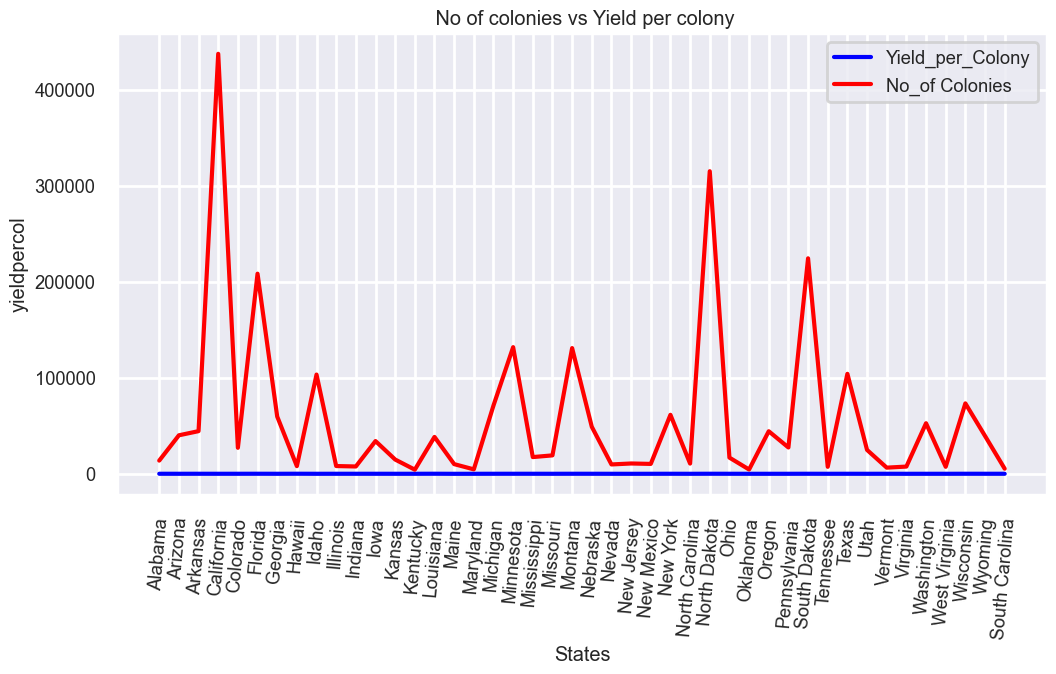

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=q3,x='State',y='yieldpercol',label='Yield_per_Colony', color ='Blue',errorbar=None)
sns.lineplot(data=q3,x='State',y='numcol',label='No_of Colonies', color ='Red',errorbar=None)
plt.xlabel('States')
plt.xticks(rotation = 85)
plt.title(' No of colonies vs Yield per colony')
plt.show()

#### Q4)Are there any patterns that can be observed between total honey production and the value of production every year?

In [ ]:
q4 = USA_df.groupby('year')[['totalprod','prodvalue']].mean().reset_index()
q4.head()

,year,totalprod,prodvalue
0,1998,5105.093023,33.974651
1,1999,4706.674419,28.757442
2,2000,5106.000000,30.597209
3,2001,4221.545455,30.064091
4,2002,3892.386364,51.659545


In [ ]:
USA_df['totalprod'] = USA_df['numcol'] * USA_df['yieldpercol']
USA_df.head()

In [ ]:
q4['prodvalue'] = q4['prodvalue']*100
q4.head()

,year,totalprod,prodvalue
0,1998,5105.093023,3397.465116
1,1999,4706.674419,2875.744186
2,2000,5106.000000,3059.720930
3,2001,4221.545455,3006.409091
4,2002,3892.386364,5165.954545


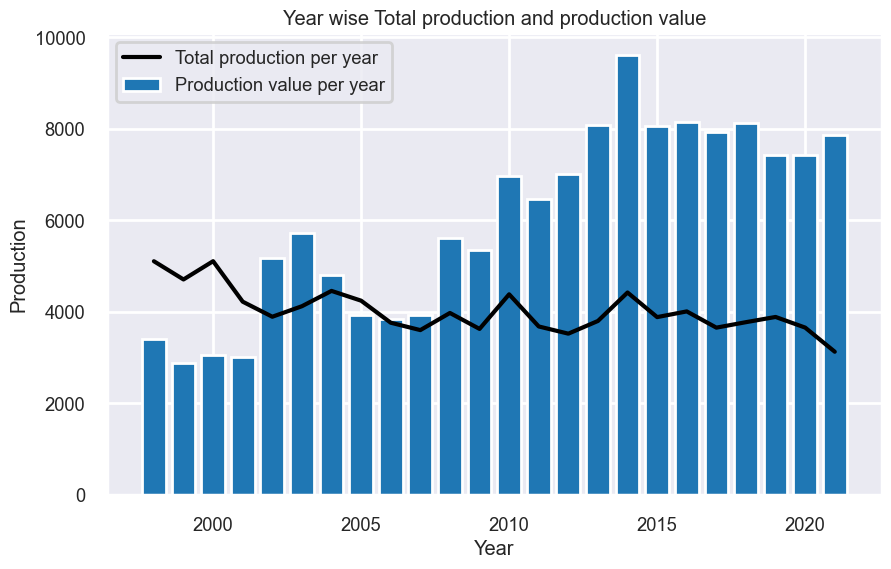

In [ ]:
fig6 = plt.figure(figsize = (10,6))
plt.plot(q4['year'],q4['totalprod'], label = 'Total production per year', color='black')
plt.bar(q4['year'],q4['prodvalue'], label = 'Production value per year')
plt.title('Year wise Total production and production value')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

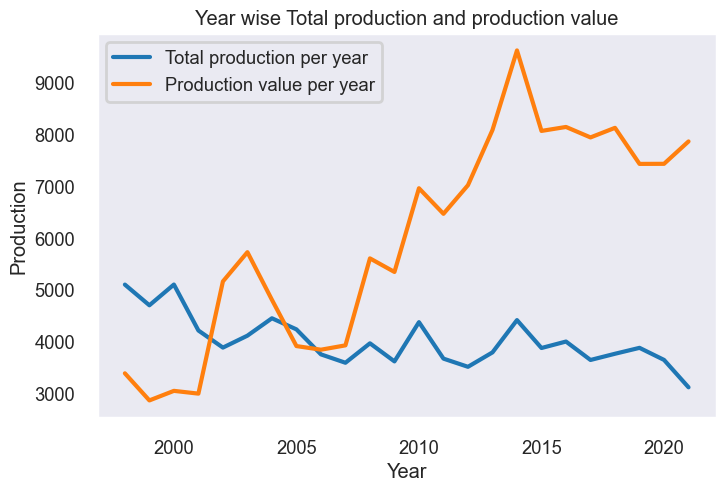

In [ ]:
fig6 = plt.figure(figsize = (8,5))
sns.lineplot(data = q4,x='year',y='totalprod', label = 'Total production per year')
sns.lineplot(data = q4,x='year',y='prodvalue', label = 'Production value per year')
plt.title('Year wise Total production and production value')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.grid()
plt.show()

### Q5) How has the value of production, which in some sense could be tied to demand, changed every year?

In [ ]:
USA_df.head()


,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,113600.0,159000.0,0.72,8.18,1998
1,Arizona,55000.0,60,330000.0,1485000.0,0.64,21.12,1998
2,Arkansas,53000.0,65,344500.0,1688000.0,0.59,20.33,1998
3,California,450000.0,83,3735000.0,12326000.0,0.62,231.57,1998
4,Colorado,27000.0,72,194400.0,1594000.0,0.70,13.61,1998


In [ ]:
USA_df['demand'] = USA_df['totalprod'] - USA_df['stocks']
USA_df.head()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,demand
0,Alabama,16000.0,71,113600.0,159000.0,0.72,8.18,1998,-45400.0
1,Arizona,55000.0,60,330000.0,1485000.0,0.64,21.12,1998,-1155000.0
2,Arkansas,53000.0,65,344500.0,1688000.0,0.59,20.33,1998,-1343500.0
3,California,450000.0,83,3735000.0,12326000.0,0.62,231.57,1998,-8591000.0
4,Colorado,27000.0,72,194400.0,1594000.0,0.70,13.61,1998,-1399600.0


In [ ]:
fig8 = plt.figure(figsize = (8,6))
plt.bar(USA_df['year'],USA_df['demand'], label = 'Demand per year')
plt.bar(USA_df['year'],USA_df['prodvalue'], label = 'Value produced per year')
plt.title('Year wise Value prod and Demand')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

In [ ]:
fig9 = plt.figure(figsize = (7,4))
##sns.lineplot(data=q3,x='State',y='yieldpercol',label='Yield_per_Colony', color ='Blue',errorbar=None)
sns.lineplot(data = USA_df, x='year',y='demand', label = 'Demand per year', errorbar = None)
sns.lineplot(data = USA_df, x='year',y='prodvalue', label = 'Value produced per year', errorbar = None)
plt.title('Year wise Value prod and Demand')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()